## CZ4032 Data Analytics and Mining 


#### Importing important modules and libraries 

In this project, we mainly used Sci-Kit Learn. The following libraries and modules were imported

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

#### Importing the CSV downloaded from kaggle
The data was taken from: https://www.kaggle.com/code/juniorbueno/miami-florida-prediction-prices/data

In [2]:
miamiData = pd.read_csv("./miami_housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]])
miamiData.head()

LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  0.845660   0.903382  622280070620  0.142746        9375          1753   
1  0.846203   0.918989  622280100460  0.107448        9375          1715   
2  0.846222   0.919529  622280100470  0.282389        9375          2276   
3  0.847019   0.922091  622280100530  0.355314       12450          2058   
4  0.847130   0.917398  622280100200  0.264934       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9    0.166541    0.006897    42815.3     37742.2   
1              0     4359.1    0.137895    0.006702    43504.9     37340.5   
2          49206     4412.9    0.136911    0.005895    43530.4     37328.7   
3          10033     4585.0    0.131381    0.000000    43797.5     37423.2   
4          16681     4063.4    0.140390    0.006480    43599.7     37550.8   

   HWY_DIST  age  avno60plus  month_sold  structure_quality  
0  0.329985   67           0           8                  4  
1  0.375122   63           0           9                  4  
2  0.376693   61           0           2                  4  
3  0.383222   63           0           9                  4  
4  0.370513   42           0           7                  4

In [3]:
def kmeans(varname1, varname2, k):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents = np.random.rand(k,2)
    k_means = KMeans(n_clusters=k, init=init_cents, random_state=42, n_init=1, max_iter=300) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[str(varname1), str(varname2)]])
    end = time.time()
    print("Total Time taken for K-means: ", end-start)
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker='x', s=100)
    

def kmeanspp(varname1, varname2,k):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents, indices = kmeans_plusplus(X[[varname1, varname2]].to_numpy(), n_clusters=k, random_state=42)
    k_means = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=1, max_iter=10) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[varname1, varname2]])
    end = time.time()
    print("Total Time taken for K-means++: ", end-start)
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker ='x', s=100)

## Kmeans vs Kmeans++ vs DBscan

## Longitude and Latitude 

#### Finding the elbow curve for Kmeans and Kmeans++

Reference: 
https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera 


In the above article, the following image is shown:

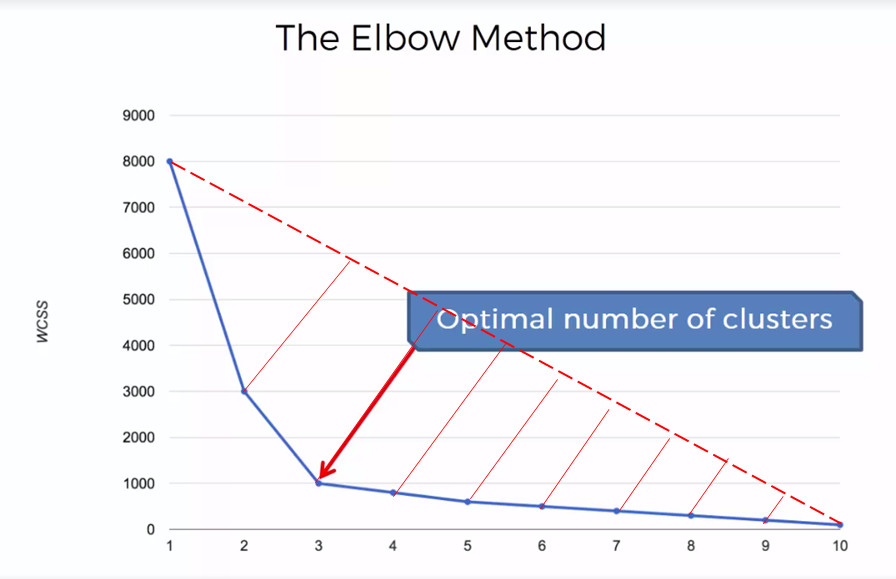




It shows how to get the Elbow Curve by drawing a straight line from the first point to the last point. The largest distance to this imaginary point shall be the optimal K.



Another way is to use the Silhouette Score

k:  2 Inertia:  542.1250060183847 Difference:  -542.1250060183847 Silhouette Score:  0.5359941758491561
k:  3 Inertia:  374.57681438015857 Difference:  167.54819163822617 Silhouette Score:  0.4163433360445719
k:  4 Inertia:  279.5190503996892 Difference:  95.05776398046936 Silhouette Score:  0.40452806897889676
k:  5 Inertia:  211.1692898323043 Difference:  68.34976056738492 Silhouette Score:  0.4327154017725779
k:  6 Inertia:  162.14146908863574 Difference:  49.02782074366854 Silhouette Score:  0.4440016676750439
k:  7 Inertia:  139.03271126312492 Difference:  23.10875782551082 Silhouette Score:  0.432558256794099
k:  8 Inertia:  123.58998082849475 Difference:  15.442730434630178 Silhouette Score:  0.4052277605220029
k:  9 Inertia:  108.63442542063444 Difference:  14.955555407860302 Silhouette Score:  0.4007181228398768
k:  10 Inertia:  96.4069179381046 Difference:  12.227507482529845 Silhouette Score:  0.3936568564354571
k:  11 Inertia:  85.57579621044049 Difference:  10.831121727664

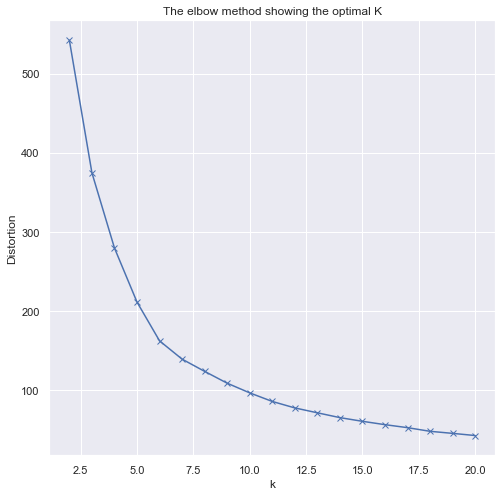

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

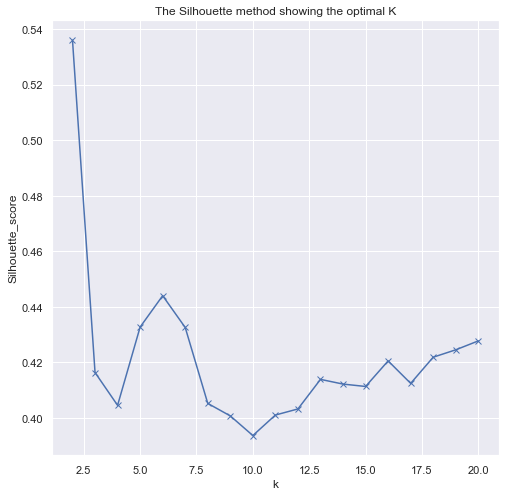

In [4]:
#Between the variables Latitude and Longitude 

data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


#### Kmeans 

Total Time taken for K-means:  0.05301189422607422


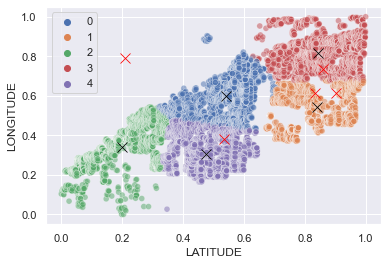

In [5]:
kmeans("LATITUDE", "LONGITUDE", 5)

Total Time taken for K-means:  0.044007062911987305


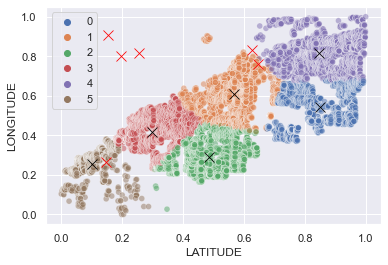

In [6]:
kmeans("LATITUDE", "LONGITUDE", 6)

Total Time taken for K-means:  0.04900860786437988


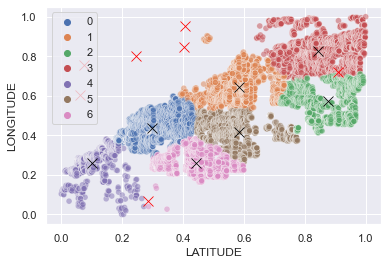

In [7]:
kmeans("LATITUDE", "LONGITUDE", 7)

#### Kmeans++

Total Time taken for K-means++:  0.05101132392883301


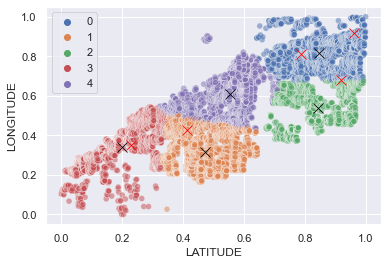

In [8]:
kmeanspp("LATITUDE", "LONGITUDE", 5)

Total Time taken for K-means++:  0.05201101303100586


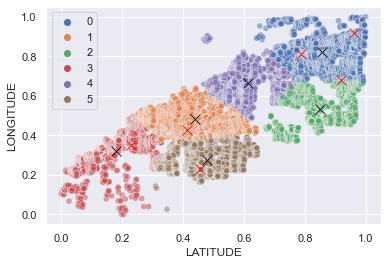

In [9]:
kmeanspp("LATITUDE", "LONGITUDE", 6)

Total Time taken for K-means++:  0.05368494987487793


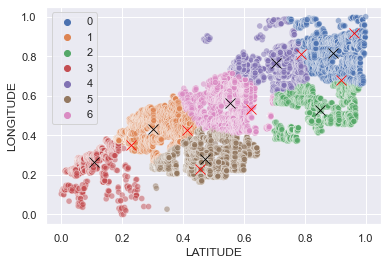

In [10]:
kmeanspp("LATITUDE", "LONGITUDE", 7)

#### DBScan

## Ocean_Dist and Water_Dist

#### Finding the elbow curve for Kmeans and Kmeans++

k:  2 Inertia:  715.1297761089951 Difference:  -715.1297761089951 Silhouette Score:  0.5049307176348775
k:  3 Inertia:  424.97344756817176 Difference:  290.1563285408233 Silhouette Score:  0.5074606390570462
k:  4 Inertia:  298.2529371049162 Difference:  126.72051046325555 Silhouette Score:  0.47638630594076337
k:  5 Inertia:  218.97377103115102 Difference:  79.2791660737652 Silhouette Score:  0.443161906877429
k:  6 Inertia:  175.4667534461111 Difference:  43.507017585039904 Silhouette Score:  0.44028698375908404
k:  7 Inertia:  145.3077814678132 Difference:  30.158971978297927 Silhouette Score:  0.4133953136868569
k:  8 Inertia:  127.99790507996309 Difference:  17.309876387850096 Silhouette Score:  0.4189559820305884
k:  9 Inertia:  114.37168000176096 Difference:  13.626225078202125 Silhouette Score:  0.3919689980279651
k:  10 Inertia:  102.8449428088224 Difference:  11.526737192938569 Silhouette Score:  0.3890487085166742
k:  11 Inertia:  92.49788863480155 Difference:  10.3470541740

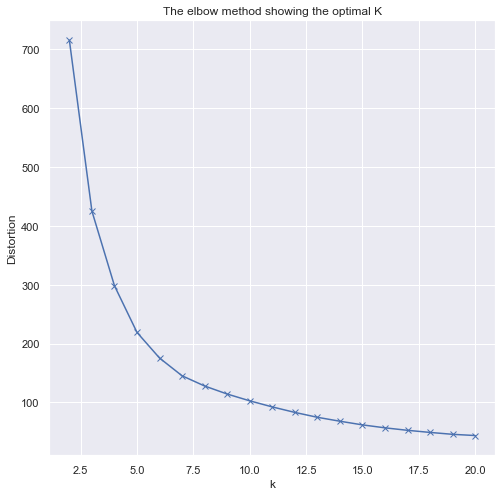

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

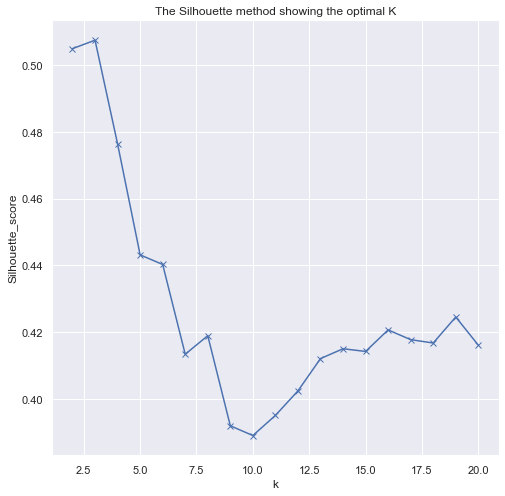

In [11]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'WATER_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


#### Kmeans

Total Time taken for K-means:  0.044004201889038086


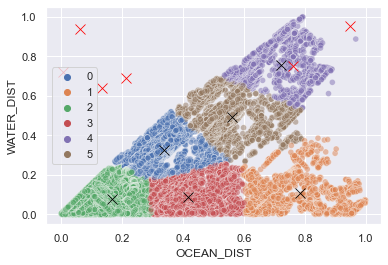

In [12]:
kmeans("OCEAN_DIST", "WATER_DIST", 6)

Total Time taken for K-means:  0.05001020431518555


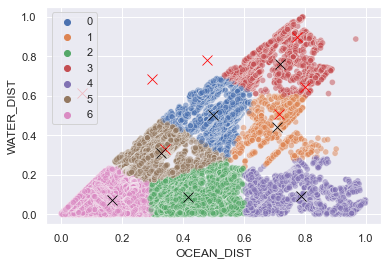

In [13]:
kmeans("OCEAN_DIST", "WATER_DIST", 7)

Total Time taken for K-means:  0.0636453628540039


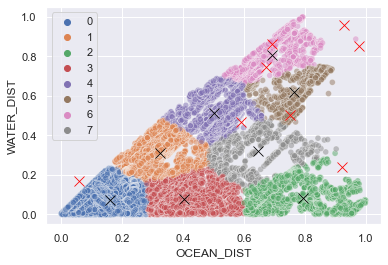

In [14]:
kmeans("OCEAN_DIST", "WATER_DIST",8)

#### Kmeans++

Total Time taken for K-means++:  0.05601048469543457


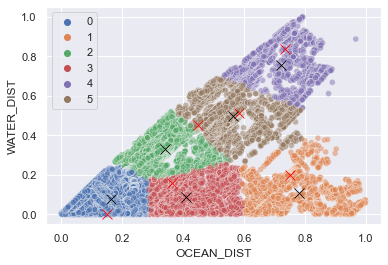

In [15]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 6)

Total Time taken for K-means++:  0.053655147552490234


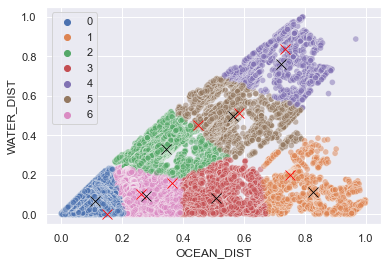

In [16]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 7)

Total Time taken for K-means++:  0.05701279640197754


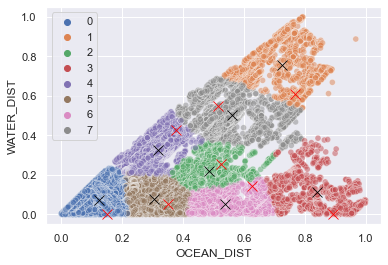

In [17]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 8)

#### DBSCan

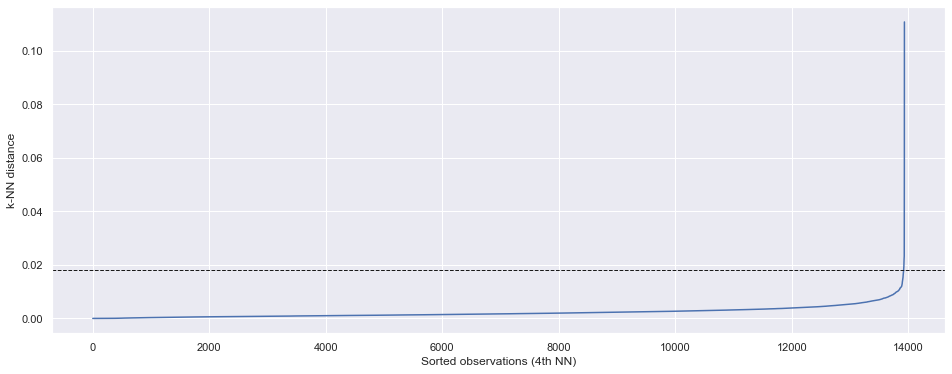

In [18]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.018, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

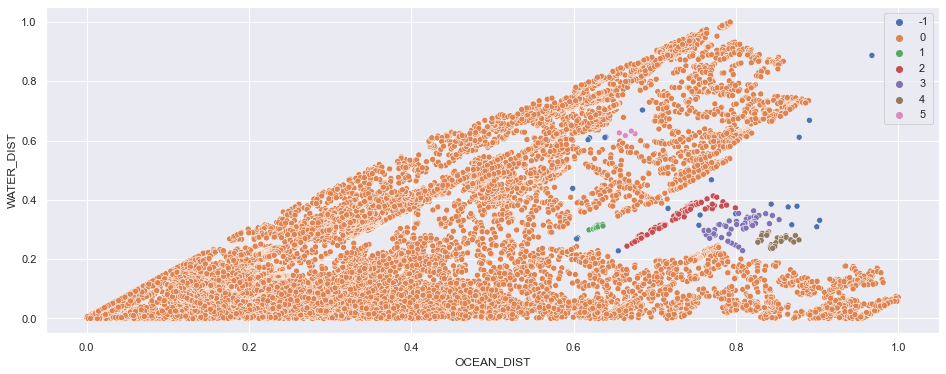

In [19]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])

clusters = DBSCAN(eps=0.018, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="WATER_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


## Ocean_Dist and SALE_PRC

#### Finding the elbow curve for Kmeans and Kmeans++

k:  2 Inertia:  424.39022125457564 Difference:  -424.39022125457564 Silhouette Score:  0.5096343026502334
k:  3 Inertia:  271.1821290347566 Difference:  153.20809221981904 Silhouette Score:  0.49152352478530287
k:  4 Inertia:  180.46149031904758 Difference:  90.72063871570901 Silhouette Score:  0.45176399905566994
k:  5 Inertia:  136.4346347272846 Difference:  44.026855591762995 Silhouette Score:  0.4251238300965224
k:  6 Inertia:  111.4772245914637 Difference:  24.957410135820894 Silhouette Score:  0.4182109279525521
k:  7 Inertia:  95.80765197997276 Difference:  15.669572611490935 Silhouette Score:  0.3925341824685955
k:  8 Inertia:  84.4301169316089 Difference:  11.377535048363868 Silhouette Score:  0.38231255674795217
k:  9 Inertia:  73.62139374154435 Difference:  10.80872319006454 Silhouette Score:  0.3961371889417907
k:  10 Inertia:  65.26549931274401 Difference:  8.35589442880034 Silhouette Score:  0.4120095013189382
k:  11 Inertia:  57.74524551179506 Difference:  7.520253800948

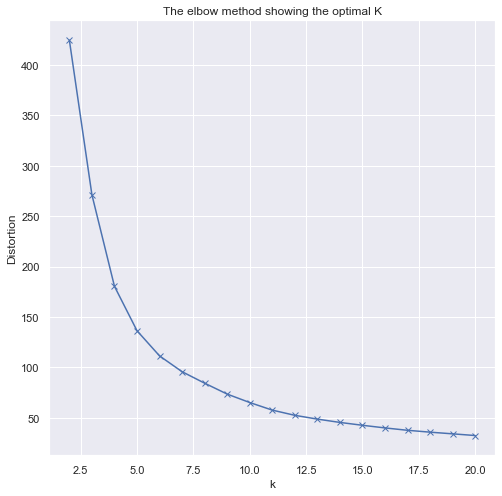

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

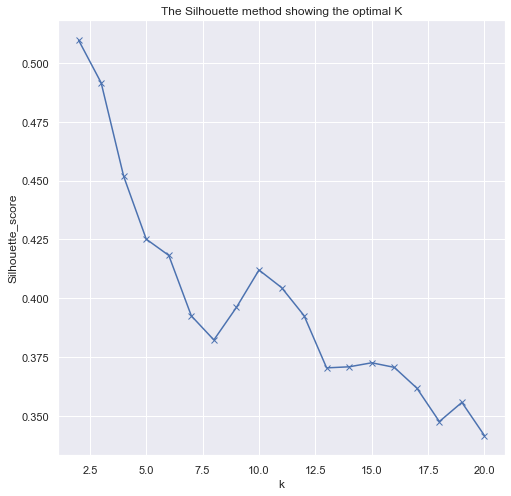

In [20]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'SALE_PRC']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


Total Time taken for K-means:  0.05901002883911133


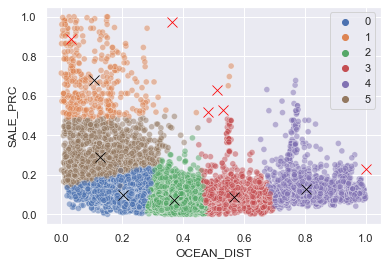

In [21]:
kmeans("OCEAN_DIST", "SALE_PRC",6)

Total Time taken for K-means:  0.06368327140808105


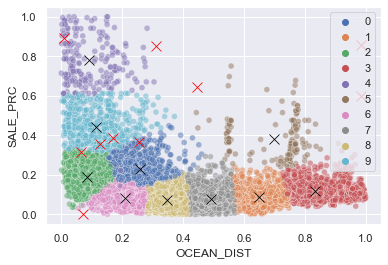

In [22]:
kmeans("OCEAN_DIST", "SALE_PRC",10)

Total Time taken for K-means++:  0.056012868881225586


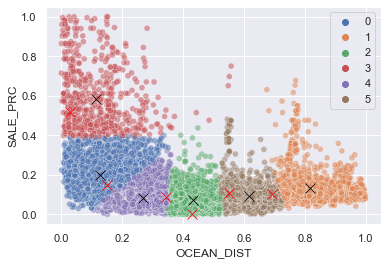

In [23]:
kmeanspp("OCEAN_DIST", "SALE_PRC", 6)

Total Time taken for K-means++:  0.06865477561950684


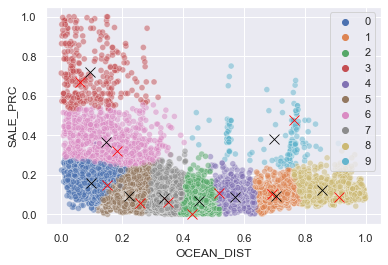

In [24]:
kmeanspp("OCEAN_DIST", "SALE_PRC",10)

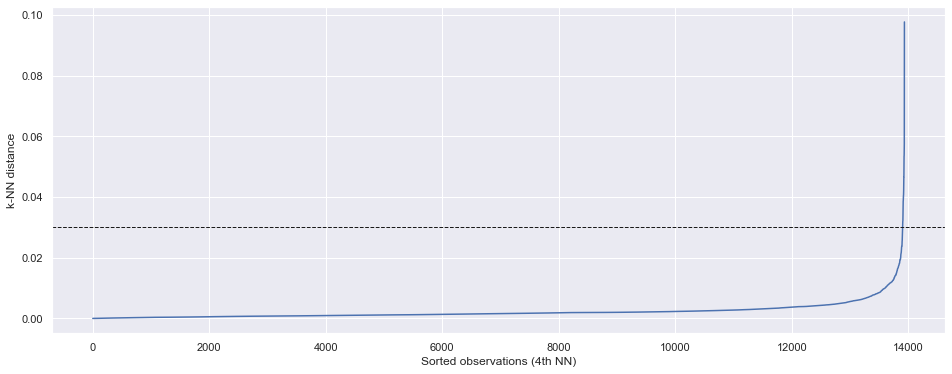

In [25]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.03, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

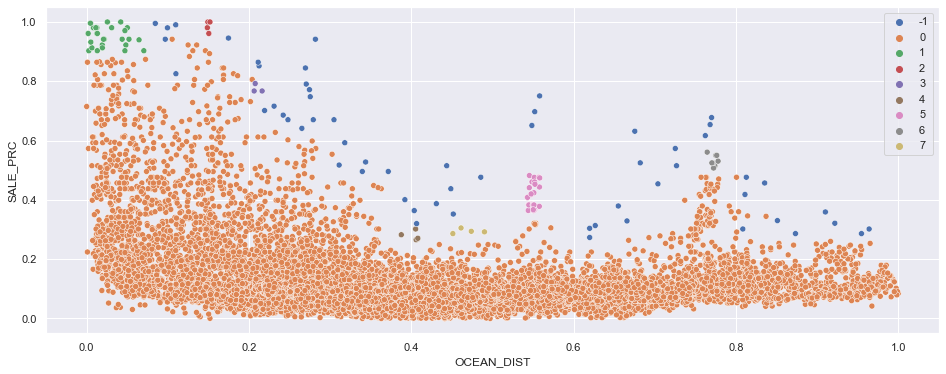

In [26]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])

clusters = DBSCAN(eps=0.03, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="SALE_PRC", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


Note: Although better at clustering than Kmeans at the visual level, it is not ideal.<br>
Almost entire range of sale price is now clustered together because points are reachable.

## Ocean_Dist and HWY_DIST

#### Finding the elbow curve for Kmeans and Kmeans++

K:  2 Inertia:  421.4777032722435 Difference:  -421.4777032722435 Silhouette Score:  0.5061237654704477
K:  3 Inertia:  284.0631275895212 Difference:  137.41457568272233 Silhouette Score:  0.4211863369928991
K:  4 Inertia:  205.11421505045328 Difference:  78.94891253906789 Silhouette Score:  0.43419607920951353
K:  5 Inertia:  151.62011553122935 Difference:  53.49409951922394 Silhouette Score:  0.4188395206465355
K:  6 Inertia:  125.08830660819628 Difference:  26.53180892303307 Silhouette Score:  0.39731926187539696
K:  7 Inertia:  109.55553774945629 Difference:  15.532768858739985 Silhouette Score:  0.39409871411823966
K:  8 Inertia:  95.33379794362213 Difference:  14.221739805834162 Silhouette Score:  0.38721013961841555
K:  9 Inertia:  84.21104353948343 Difference:  11.122754404138703 Silhouette Score:  0.3925953256181355
K:  10 Inertia:  75.18734212111333 Difference:  9.023701418370095 Silhouette Score:  0.3830783416162223
K:  11 Inertia:  66.86709894158743 Difference:  8.320243179

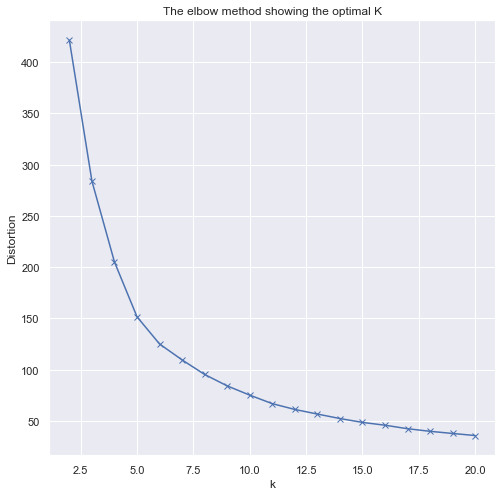

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

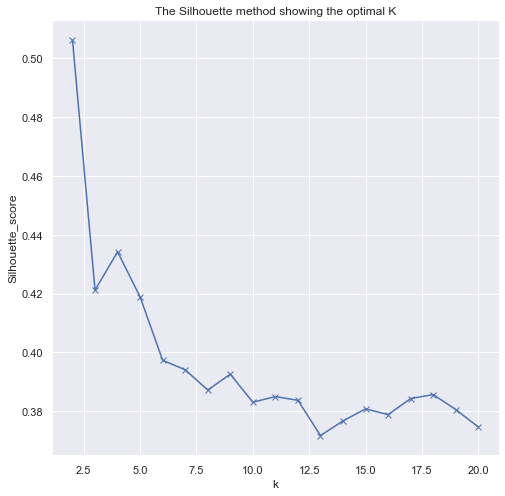

In [27]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'HWY_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("K: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


Total Time taken for K-means:  0.02298903465270996


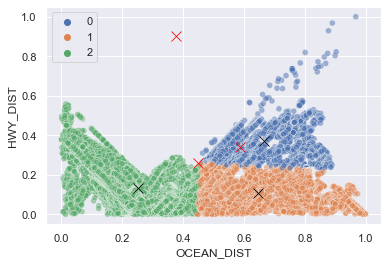

In [28]:
kmeans("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means:  0.025986909866333008


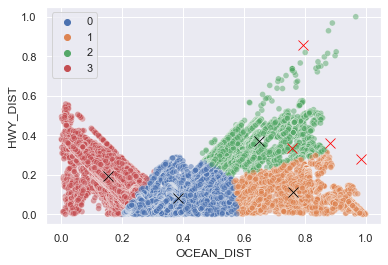

In [29]:
kmeans("OCEAN_DIST", "HWY_DIST",4)

Total Time taken for K-means:  0.026987075805664062


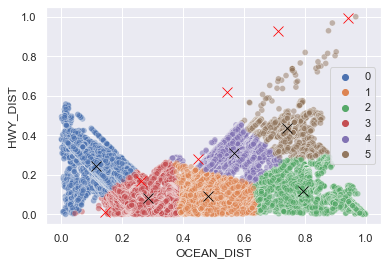

In [30]:
kmeans("OCEAN_DIST", "HWY_DIST",6)

Total Time taken for K-means++:  0.020000219345092773


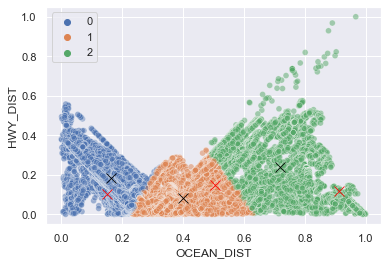

In [31]:
kmeanspp("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means++:  0.021004199981689453


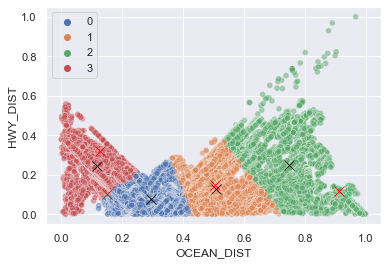

In [32]:
kmeanspp("OCEAN_DIST", "HWY_DIST",4)

Total Time taken for K-means++:  0.0200040340423584


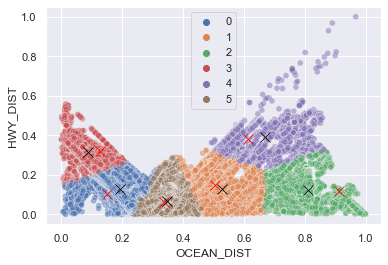

In [33]:
kmeanspp("OCEAN_DIST", "HWY_DIST",6)

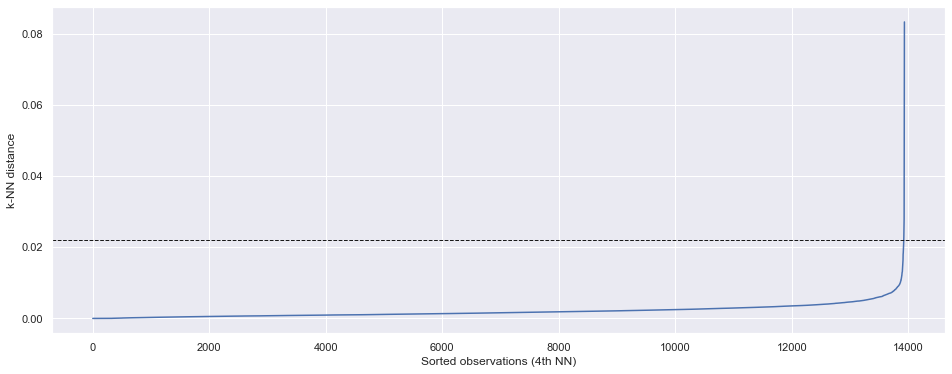

In [34]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.022, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

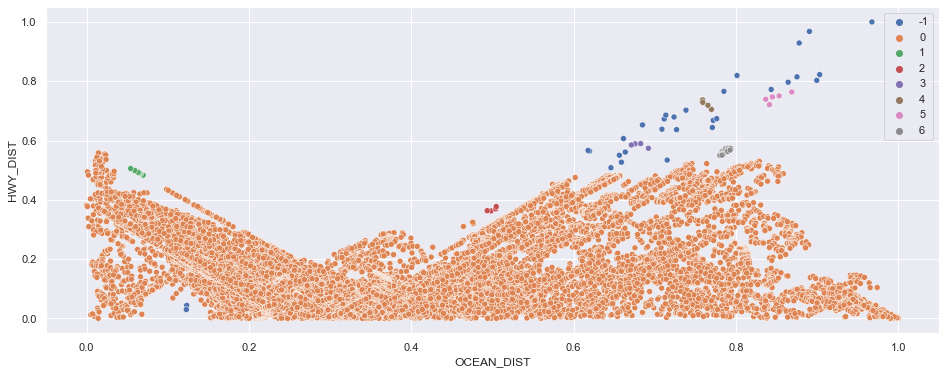

In [35]:
#for dbscan
dataset = pd.read_csv('./miami_housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])

clusters = DBSCAN(eps=0.022, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="HWY_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### Further Exploration 

Here we explore 3-dimensions for Kmeans and Kmeans++

In [36]:
def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    print(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    init_cents = np.random.rand(5,3)
    k_means = KMeans(n_clusters=5, init=init_cents, random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(init_cents[:,0], init_cents[:,1], init_cents[:,2], color="black", marker="x", s=200)
    print("Data for kmeans: ", varname)
    print("Time Taken for kmeans: ", end-start)
    plt.show()
    
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    centers_init, indices = kmeans_plusplus(X[["LATITUDE", "LONGITUDE", varname]].to_numpy(), n_clusters=5, random_state=42)
    
    k_means = KMeans(n_clusters=5, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    print("Data for kmeans++: ", varname)
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(centers_init[:,0], centers_init[:,1], centers_init[:,2], color="black", marker="x", s=200)
    plt.show()

       LATITUDE  LONGITUDE  TOT_LVG_AREA
0      0.845660   0.903382      0.165470
1      0.846203   0.918989      0.158476
2      0.846222   0.919529      0.261734
3      0.847019   0.922091      0.221609
4      0.847130   0.917398      0.152770
...         ...        ...           ...
13927  0.645862   0.668466      0.020799
13928  0.646704   0.667142      0.184060
13929  0.647090   0.677152      0.076753
13930  0.647485   0.673799      0.139702
13931  0.648189   0.670582      0.186453

[13932 rows x 3 columns]
Data for kmeans:  TOT_LVG_AREA
Time Taken for kmeans:  0.023988723754882812


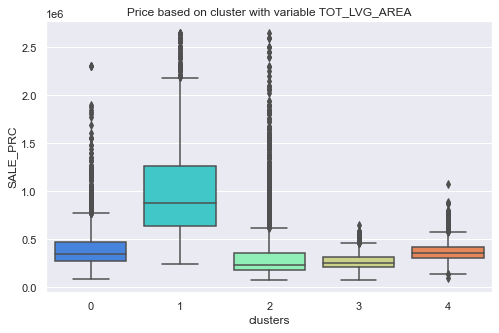

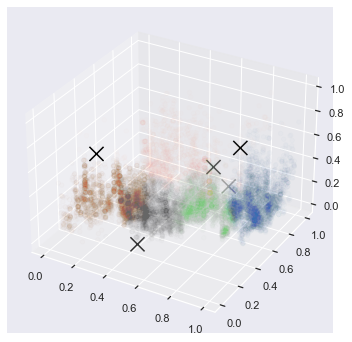

Data for kmeans++:  TOT_LVG_AREA
Time Taken for kmeans++:  0.2580580711364746


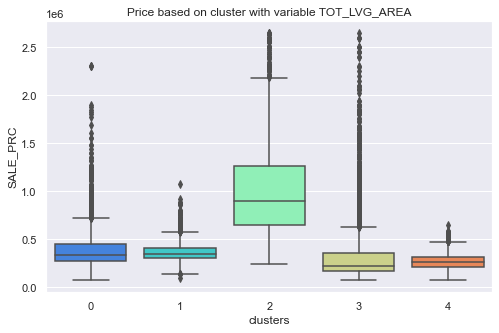

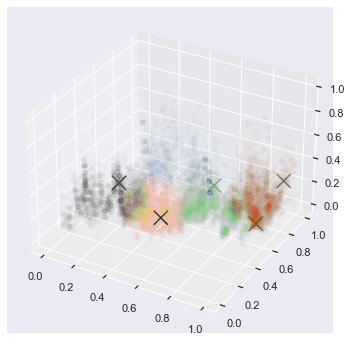

       LATITUDE  LONGITUDE  OCEAN_DIST
0      0.845660   0.903382    0.166541
1      0.846203   0.918989    0.137895
2      0.846222   0.919529    0.136911
3      0.847019   0.922091    0.131381
4      0.847130   0.917398    0.140390
...         ...        ...         ...
13927  0.645862   0.668466    0.269265
13928  0.646704   0.667142    0.272231
13929  0.647090   0.677152    0.265821
13930  0.647485   0.673799    0.268929
13931  0.648189   0.670582    0.273127

[13932 rows x 3 columns]
Data for kmeans:  OCEAN_DIST
Time Taken for kmeans:  0.02498936653137207


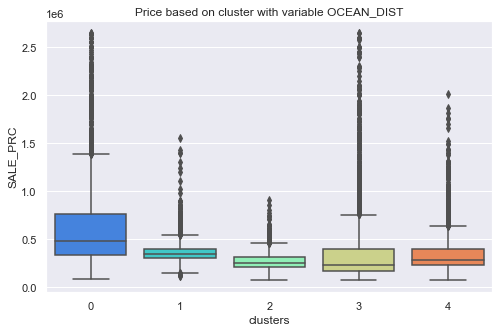

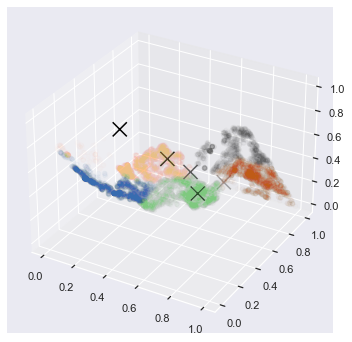

Data for kmeans++:  OCEAN_DIST
Time Taken for kmeans++:  0.2160487174987793


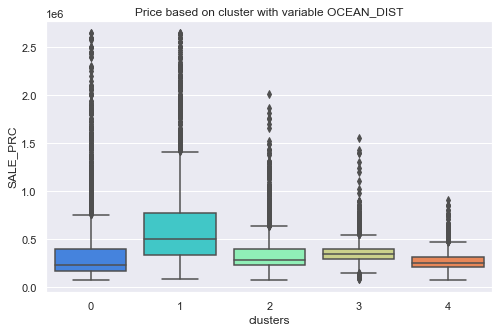

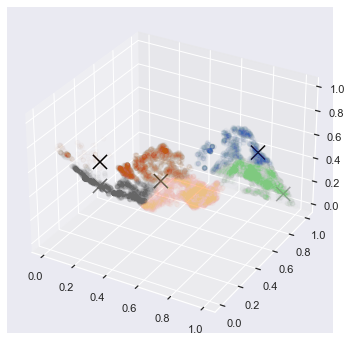

       LATITUDE  LONGITUDE  HWY_DIST
0      0.845660   0.903382  0.329985
1      0.846203   0.918989  0.375122
2      0.846222   0.919529  0.376693
3      0.847019   0.922091  0.383222
4      0.847130   0.917398  0.370513
...         ...        ...       ...
13927  0.645862   0.668466  0.017206
13928  0.646704   0.667142  0.013478
13929  0.647090   0.677152  0.013593
13930  0.647485   0.673799  0.011147
13931  0.648189   0.670582  0.007998

[13932 rows x 3 columns]
Data for kmeans:  HWY_DIST
Time Taken for kmeans:  0.024004220962524414


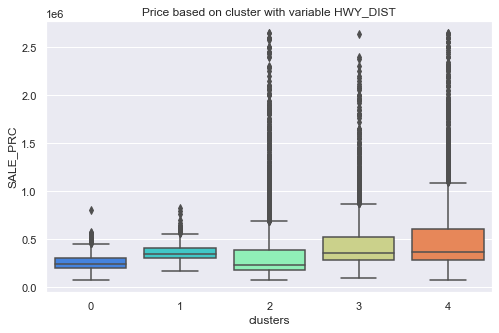

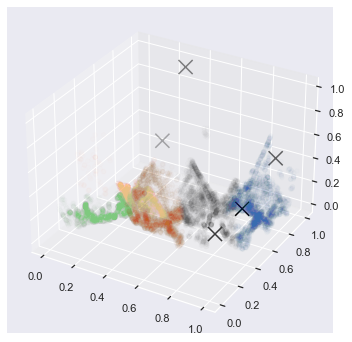

Data for kmeans++:  HWY_DIST
Time Taken for kmeans++:  0.2290511131286621


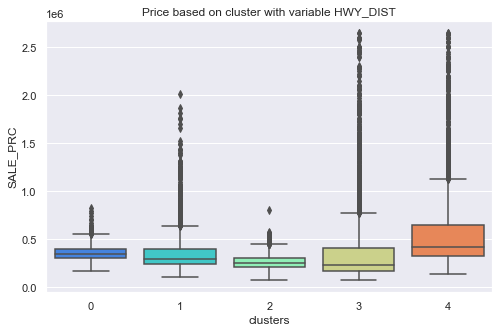

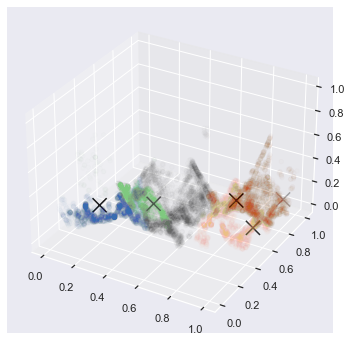

In [37]:
#list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]
list = ["TOT_LVG_AREA", "OCEAN_DIST", "HWY_DIST"]
for item in list:
    three_Feature_clustering(item)
    three_Feature_clustering_kmeanspp(item)